In [1]:
import numpy as np
from scipy.signal import chirp
import matplotlib.pyplot as plt
from cmath import phase

In [16]:
#convertion bin gray en décimal
def gray2dec(num):
    """retourne le nombre entier correspondant au code Gray num"""
    shift = 1
    while True:
        idiv = num >> shift
        num ^= idiv
        if idiv <= 1 or shift == 32: 
            return num
        shift <<= 1
        
        
#génération d'un seul chirp
def mod_LoRa(SF,data,B):
    #constantes
    M=2**SF
    TS=M/(B[1]-B[0])
    l=gray2dec(int(data,2))
    D=np.linspace(0, TS, num=M)
    S=[(i*(B[1]-B[0])/(TS))-(B[1]-B[0])/2 for i in D]
    A=S[0:l+1]
    B=S[l+1:len(S)]
    X=B+A
    #plt.plot(D, X)
    #plt.xlabel('t (sec)')
    #plt.show()
    return X


#génération des chirps du stream de bits avec un préambule de 2 up chirps puis 2 down chirps
def mod_seq(SF,data,B):
    l=str(data)
    M=2**SF
    TS=M/(B[1]-B[0])
    p=mod_LoRa(SF,'0',B)*2
    pa=[-i for i in p]
    p=p+pa
    if len(l)%SF==0:
        b=len(l)//SF
        f=[] 
        for i in range(0,b):
            f=f+mod_LoRa(SF,l[SF*i:SF*i+SF],B)
        D=np.linspace(0, (b+4)*TS, num=len(f)+4*M)
        plt.plot(D, p+f) 
        plt.show()
    else:
        b=int(len(l)/SF)
        f=[]
        for i in range(0,b):
            f=f+mod_LoRa(SF,l[SF*i:SF*i+SF],B)
        f=f+mod_LoRa(SF,l[b:b+len(l)%SF],B)
        D=np.linspace(0, (b+5)*TS, num=len(f)+4*M)
        plt.plot(D, p+f)
        plt.show()
    return p+f  
    

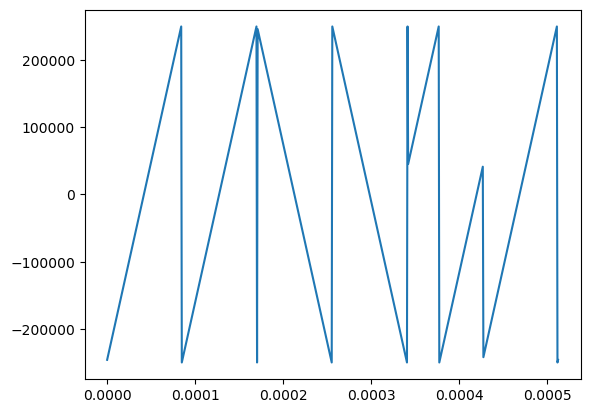

In [17]:
#exemple
Tx=mod_seq(7,'11011110',[-250000,250000])